In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.path as mpath
import matplotlib.patches as patches
from astropy.io import fits
from astropy.visualization.mpl_normalize import simple_norm
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import (ListedColormap, LinearSegmentedColormap)
from astropy.convolution import convolve, Gaussian1DKernel
from scipy.optimize import curve_fit
from scipy.special import gammaincinv

In [5]:
plt.rcParams.update({
    'text.usetex': False,
    'text.latex.preamble': r'\usepackage{amsmath}',
    'font.family': 'serif',
    'font.weight': 'normal',
    'figure.facecolor': 'lightgray',
    'mathtext.fontset': 'dejavuserif'
})

# TAREA 2 ASTROFÍSICA EXTRAGALÁCTICA

## PREGUNTA 1

### a)

In [1]:
from astropy.io.votable import parse

# Path to your .vot file
file_path = '1715657717558O-result.vot'

# Parse the VOTable file
votable = parse(file_path)

# Get the first table in the VOTable file
table = votable.get_first_table().to_table()

table


SOURCE_ID,ra,dec,phot_g_mean_mag,bp_rp,parallax,pmra,pmdec,radial_velocity,mh_gspspec
,deg,deg,mag,mag,mas,mas / yr,mas / yr,km / s,dex
int64,float64,float64,float32,float32,float64,float64,float64,float32,float32
5459877261220464512,149.70611681294855,-32.68303930843214,13.933306,1.2644653,0.23448965942102795,-5.6892348361733625,0.7934198902356729,79.24201,--
5459233389783747968,152.37909102063972,-33.01525465327407,11.9115505,1.4168272,0.5575443188983249,2.866809003585728,0.7451810768524542,16.321693,-0.3
5460192099502918656,151.86436887949762,-31.422031870560264,13.724075,1.3626871,0.26420744490678016,-5.263113770519455,0.16520992867345247,53.045547,--
5463677340905512960,151.16936133573813,-29.876993635484787,11.2974825,1.3634672,0.9514885932987311,-0.5514300283638798,-3.4197403190506512,32.012726,-0.13
5462669230478657152,153.79661772767756,-28.61955493263212,13.261548,1.2417736,0.3365398963513322,-10.312181007112393,0.15492737182833377,35.99848,--
5461473610365447680,155.4105841546194,-30.34561239247855,12.354918,1.2081184,0.4568285937809801,-7.8196608164827275,1.1067586498636734,-18.218866,-0.22
5462845976972672000,154.72999566638708,-27.58032178005161,11.816365,1.205657,0.5432589112633787,-6.389765334328132,5.389302912200473,26.49547,-0.19
5459508508210738560,150.37331151993706,-33.9320117399819,12.473149,1.3725348,0.3432709846365381,-5.098136894374841,-1.0097080884426088,-16.62605,-0.16


- ra: ascensión recta en grados
- dec: declinación en grados
- 

## PREGUNTA 2

$$I(r) = I_e \exp\bigg\{-b_n\left[\left(\frac{r}{r_e}\right)^{1/n}-1\right]\bigg\}$$

### c) Graficar el perfil radial para índices 0.5, 1, 2, 4, y 6.

- Usar $I_e$ y $r_e$ como unidades


para unidades $r_e$:  $$R = \frac{r}{r_e}$$ 

para unidades $I_e$: $$I(R) \equiv \frac{I(r)}{I_e} = \exp\bigg\{-b_n\left[R^{1/n}-1\right]\bigg\}$$

In [6]:
def calculate_b_coefficients(n):
    return gammaincinv(2.0 * n, 0.5)

def radial_profile(r_array, n):
    b = calculate_b_coefficients(n)
    return np.exp(-b * (r_array ** (1/n) - 1))

In [7]:
radial_array = np.linspace(0.1, 3.2, 500)

In [8]:
radial_profile_0_5 = radial_profile(radial_array, 0.5)
radial_profile_1 = radial_profile(radial_array, 1)
radial_profile_2 = radial_profile(radial_array, 2)
radial_profile_4 = radial_profile(radial_array, 4)
radial_profile_6 = radial_profile(radial_array, 6)

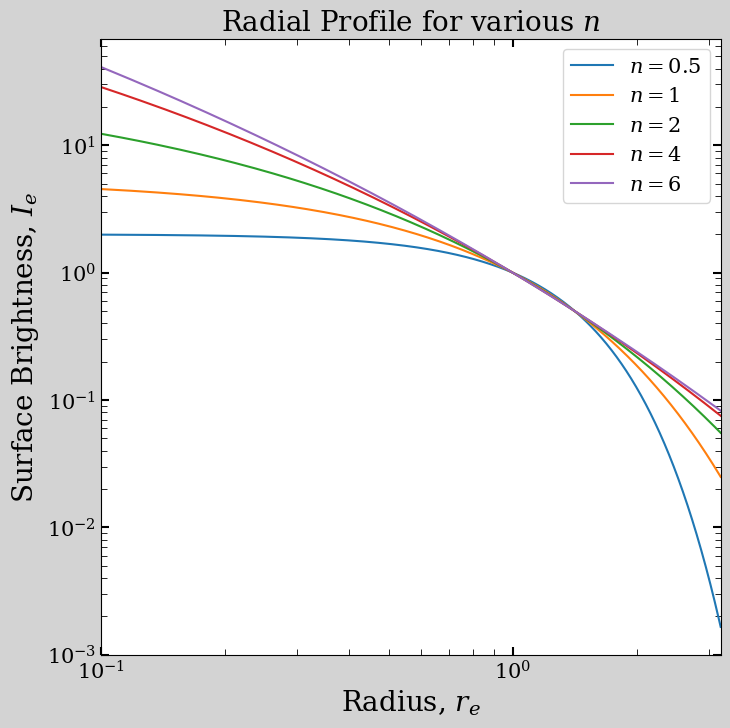

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(radial_array, radial_profile_0_5, label=r'$n=0.5$')
ax.plot(radial_array, radial_profile_1, label=r'$n=1$')
ax.plot(radial_array, radial_profile_2, label=r'$n=2$')
ax.plot(radial_array, radial_profile_4, label=r'$n=4$')
ax.plot(radial_array, radial_profile_6, label=r'$n=6$')


ax.set_ylabel(r'Surface Brightness, $I_{e}$', fontsize=20)
ax.set_xlabel(r"Radius, $r_e$", fontsize=20)
ax.set_title(r'Radial Profile for various $n$', fontsize=20)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.1, 3.2)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(False, which='both')
ax.legend(fontsize=15, markerscale=1)

### d) Usar Sersic2D de astropy para generar imagenes de perfiles de sersic variando I_e, r_e y n

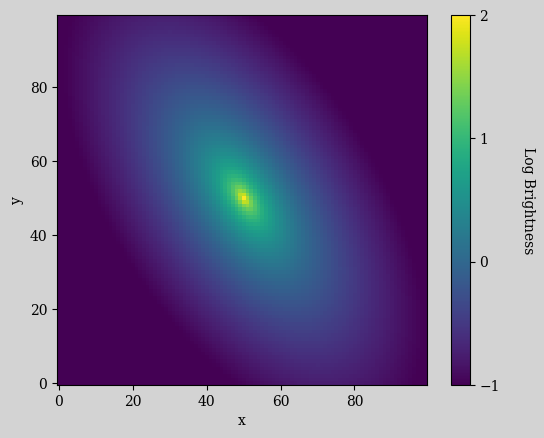

In [10]:
from astropy.modeling.functional_models import Sersic2D

sersic = Sersic2D(amplitude=1, r_eff=1, n=1, x_0=0, y_0=0, ellip=0, theta=0)

x, y = np.meshgrid(np.arange(100), np.arange(100))


mod = Sersic2D(amplitude=1, r_eff=25, n=4, x_0=50, y_0=50,
               ellip=0.5, theta=-1)
img = mod(x, y)
log_img = np.log10(img)

fig, ax = plt.subplots()
im = ax.imshow(log_img, origin='lower', interpolation='nearest',
               vmin=-1, vmax=2)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Log Brightness', rotation=270, labelpad=25)
cbar.set_ticks([-1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## PREGUNTA 3

### a) Estimar velocidad de escape en galaxias elipticas enanas, cuya masa va entre $10⁷ - 10^9 M_{\odot}$ y diámetro entre $1-10$ kpc.

$$v_e = \sqrt{\frac{4GM}{D}}$$

In [6]:
def calculate_escape_vel(mass, diameter):
    return np.sqrt(4 * const.G * mass / diameter).to(u.km / u.s)

In [23]:
mass_array = np.linspace(10 ** 7, 10 ** 9, 1000) * u.M_sun
diameter_array = np.linspace(1, 10, 500) * u.kpc

# calculate escape velocity for each combination of mass and diameter
escape_velocities = np.array([[calculate_escape_vel(mass, diameter).value
                               for mass in mass_array] for diameter in diameter_array])

escape_velocities


array([[ 13.1162758 ,  13.75083168,  14.35736929, ..., 131.0327124 ,
        131.09775131, 131.16275798],
       [ 12.9995691 ,  13.62847879,  14.22961952, ..., 129.8668025 ,
        129.93126271, 129.99569096],
       [ 12.88592328,  13.50933487,  14.10522026, ..., 128.73147113,
        128.79536781, 128.8592328 ],
       ...,
       [  4.15523177,   4.35625886,   4.54840977, ...,  41.51111931,
         41.53172362,  41.55231771],
       [  4.1514761 ,   4.35232149,   4.54429873, ...,  41.47359984,
         41.49418552,  41.514761  ],
       [  4.14773059,   4.34839478,   4.54019882, ...,  41.43618192,
         41.45674903,  41.47730594]])

In [24]:
# put all the values in a sole array
escape_velocities = escape_velocities.flatten()

In [28]:
escape_data = escape_velocities

# Calculamos el histograma eligiendo 800 bins
bin_count = 40
hist, bin_edges = np.histogram(escape_data, bins=bin_count, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Utilizar un kernel Gaussiano para convolucionar el histograma y suavizarlo
gaussian_kernel = Gaussian1DKernel(stddev=0.5)  # Elegimos sigma 0.5, arbitrario pero conveniente
smoothed_hist = convolve(hist, gaussian_kernel)

# Ajustamos una Gaussiana al histograma suavizado
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Calculamos el promedio ponderado y la desviación estándar para el histograma
weighted_mean = np.sum(bin_centers * hist) / np.sum(hist)
weighted_std = np.sqrt(np.sum(hist * (bin_centers - weighted_mean) ** 2) / np.sum(hist))

# Usamos estos valores como priors
initial_guess = [max(hist), weighted_mean, weighted_std]

# Hacemos el ajuste utilizando curve_fit
params, _ = curve_fit(gaussian, bin_centers, smoothed_hist, p0=initial_guess)


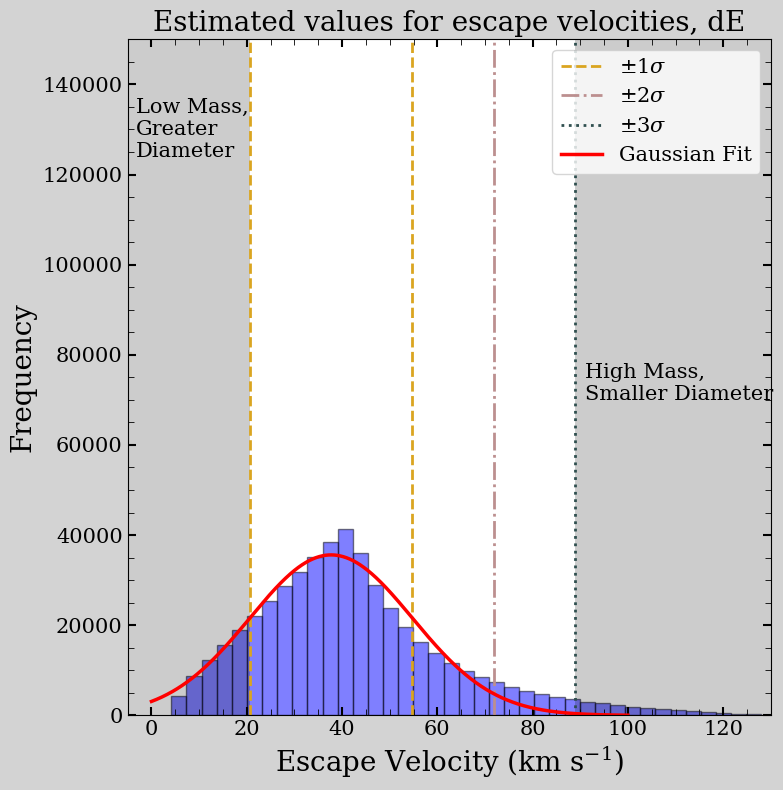

In [70]:
fig, ax= plt.subplots(figsize=(8, 8))
ax.hist(escape_velocities, bins=40, color='blue', alpha=0.5, edgecolor='black')


# Añadimos líneas verticales para 1, 2 y 3 sigma
sigma = params[2]
ax.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)

ax.plot(np.linspace(0, 100, 1000), gaussian(np.linspace(0, 100, 1000), *params), color='red', label='Gaussian Fit', linewidth=2.5)


ax.set_xlim(-5, 130)
ax.set_ylim(0, 150000)

ax.set_ylabel(r'Frequency', fontsize=20)
ax.set_xlabel(r"Escape Velocity (km s$^{-1}$)", fontsize=20)
ax.set_title(r'Estimated values for escape velocities, dE', fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5000))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

# add a rectangular patch
rect = patches.Rectangle((params[1] - 3*sigma, 0),  2 *sigma, 150000, linewidth=1, edgecolor='none', facecolor='black', alpha=0.2)
rect_1 = patches.Rectangle((params[1] + 3*sigma, 0), 3 *sigma, 150000, linewidth=1, edgecolor='none', facecolor='black', alpha=0.2)
ax.add_patch(rect)
ax.add_patch(rect_1)

# add text to the plot
ax.text(params[1] - 2.4*sigma, 124000, 'Low Mass,\nGreater\nDiameter', fontsize=15, color='black')
ax.text(params[1] + 6.25*sigma/2, 70000, 'High Mass,\nSmaller Diameter', fontsize=15, color='black')


ax.grid(False, which='both')
ax.legend(fontsize=15, markerscale=1)


plt.tight_layout()